In [1]:
import networkx as nx
import random

In [2]:
tests = True

In [3]:
def gen_grid_graph(dim, weight_range):
    G = nx.grid_2d_graph(*dim).to_directed()
    for u, v in list(G.edges):
        if u[0] > v[0] or u[1] > v[1]:
            G.remove_edge(u, v)
    
    G.add_node('s')
    G.add_node('t')
    for x in G.nodes:
        if x != 's' and x != 't':
            if x[1] == 0:
                G.add_edge('s', x)
            if x[1] == dim[1] - 1:
                G.add_edge(x, 't')
    
    relabel_map = {}
    for x in G.nodes:
        if x != 's' and x != 't':
            relabel_map[x] = x[0] * dim[1] + x[1]
    G = nx.relabel_nodes(G, relabel_map)
    
    for u, v in G.edges:
        G[u][v]['weight'] = random.randint(*weight_range)
    
    return G

In [4]:
def visualize_graph(G):
    pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

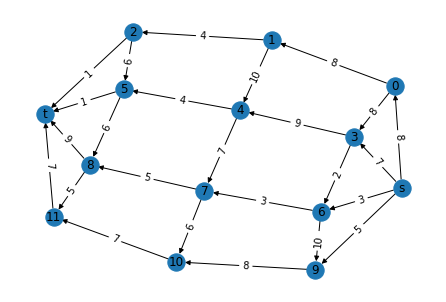

In [5]:
if tests:
    G = gen_grid_graph((4, 3), (1, 10))
    visualize_graph(G)